## Objective-1: User expertise - performed a multinomial classification to predict the expertise of  various participants in the study


- We have performed Decision Tree, Random Forest, Gradient Boosting, Light Gradient Boosting, XG Boosting classification on data before and after sampling with hyperparameter tuning.

# Before Resampling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

df = pd.read_csv('Grid_Anonymized.csv')

df = df.drop('Unnamed: 0', axis=1)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

X = pd.get_dummies(df[['Gender', 'Age', 'Fixations_Count', 'First_Fixation_Duration', 
                        'Average_Fixations_Duration', 'Time_spent_F_Percentage', 
                        'Revisit_F_Revisits', 'Revisit_F_Visitors', 'Revisit_F_Revisitors', 
                        'Duration', 'Mouse_Clicks', 'Type']])
y = df['Group']
y_encoded = y.astype('category').cat.codes

x_train,x_test,y_train,y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

new_distribution = Counter(y_encoded)
print("Data Distribution:", new_distribution)

train_distribution = Counter(y_train)
print("Training Set Distribution:", train_distribution)

test_distribution = Counter(y_test)
print("Test Set Distribution:", test_distribution)


Data Distribution: Counter({6: 2684, 3: 2440, 8: 2440, 2: 2196, 7: 1464, 1: 1464, 5: 1220, 0: 732, 4: 488, 9: 244})
Training Set Distribution: Counter({6: 1895, 3: 1707, 8: 1694, 2: 1493, 1: 1040, 7: 1035, 5: 856, 0: 513, 4: 355, 9: 172})
Test Set Distribution: Counter({6: 789, 8: 746, 3: 733, 2: 703, 7: 429, 1: 424, 5: 364, 0: 219, 4: 133, 9: 72})


### Random Forest Classifier

In [4]:
# ! pip install tensorflow
# !pip install lightgbm
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import pandas as pd
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

print('Random Forest Classifier')
## Random Forest Classifier
rf_classifier = RandomForestClassifier()
## original parameter grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  
    'max_features': [ 'sqrt', 'log2'],  
    'max_depth': [int(x) for x in np.linspace(50, 110, num=11)],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=50,
    scoring=['precision_macro', 'recall_macro', 'f1_macro'], 
    cv=stratified_kfold,
    refit='f1_macro',
    verbose=2,
    n_jobs=-1,
    random_state=42,
     error_score=np.nan,  # Set error_score to NaN to handle UndefinedMetricWarning
    return_train_score=True 
)
random_search.fit(x_train,y_train)
print("Best Parameters:", random_search.best_params_)
rfc=random_search
# y_train[:5]
print('Train Report \n',classification_report(y_train,rfc.predict(x_train)))
print('Test Report\n',classification_report(y_test,rfc.predict(x_test)))





Random Forest Classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  13.3s
[CV] END bootstrap=True, max_depth=74, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   7.6s
[CV] END bootstrap=False, max_depth=86, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   9.7s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  13.5s
[CV] END bootstrap=True, max_depth=74, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_

[CV] END bootstrap=True, max_depth=98, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   9.4s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   8.7s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   9.8s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  11.1s
[CV] END bootstrap=True, max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  12.5s
[CV] END bootstrap=False, max_depth=92, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  16.5s
[CV] END bootstrap=False, max_depth=9

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   7.5s
[CV] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=56, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  19.9s
[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  14.8s
[CV] END bootstrap=True, max_depth=98, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.2s
[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   7.3s
[CV] END bootstrap=True, max_depth=1

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=92, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  17.5s
[CV] END bootstrap=False, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   5.4s
[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   7.5s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  16.0s
[CV] END bootstrap=True, max_depth=56, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   6.1s
[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.7s
[CV] END bootstrap=False, max_depth=50

[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  16.7s


### Decision Tree Classifier

In [5]:

print('Decision Tree Classifier')
## Decision Tree Classifier
dtc = DecisionTreeClassifier()
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(10, 101, 10)),
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2', None],
}
random_model = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=param_dist_dt,
    n_iter=200,  # Increase the number of iterations
    n_jobs=-1,
    verbose=2,
    random_state=42,
    cv=stratified_kfold,
    scoring=['precision_macro', 'recall_macro', 'f1_macro'],
    refit='f1_macro',
     error_score=np.nan,  # Set error_score to NaN to handle UndefinedMetricWarning
    return_train_score=True
)

random_model.fit(x_train, y_train)
print('Best Parameters', random_model.best_params_)
dtc=random_model
print('Train Report\n', classification_report(y_train, dtc.predict(x_train)))
print('Test Report\n', classification_report(y_test, dtc.predict(x_test)))

Decision Tree Classifier
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

Best Parameters {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 40, 'criterion': 'entropy'}
Train Report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       513
           1       0.94      0.96      0.95      1040
           2       0.93      0.92      0.92      1493
           3       0.95      0.96      0.96      1707
           4       0.79      0.80      0.79       355
           5       0.87      0.88      0.88       856
           6       0.87      0.90      0.88      1895
           7       0.84      0.89      0.86      1035
           8       0.88      0.81      0.84      1694
           9       0.81      0.66      0.72       172

    accuracy                           0.90     10760
   macro avg       0.88      0.88      0.88     10760
weighted avg       0.90      0.90      0.90     10760

Test Report
               precision    recall  f1-score   support

           

### Gradient Boosting Classifier

In [ ]:
features = X
target = y_encoded
target=pd.get_dummies(target)

print('Gradient Boosting Classifier')
## Gradient Boosting Classifier
gbc=GradientBoostingClassifier()
param_grid={
    'max_features': ['sqrt','log2'],
    'max_depth': range(3,10),
    'min_samples_leaf': [3,5,7],
    'min_samples_split': range(2,10),
    'loss':['deviance','log_loss','exponential'],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[100,200,300,400,500]
}

random_model_gbc=RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    verbose=2,
    n_jobs=-1,
    scoring=['precision_macro','recall_macro','f1_weighted'],
    refit='f1_weighted',
    cv=stratified_kfold,
    n_iter=100,
    random_state=42,
     error_score=np.nan,  # Set error_score to NaN to handle UndefinedMetricWarning
    return_train_score=True
)

random_model_gbc.fit(x_train,y_train)
print('Best Parameters ',random_model_gbc.best_params_)
print('Train, Report\n',classification_report(y_train,random_model_gbc.predict(x_train)))
print('Test, Report\n',classification_report(y_test,random_model_gbc.predict(x_test)))







### Light Gradient Boosting Classifier

In [7]:

print('Light Gradient Boosting Classifier')
## Light Gradient Boosting Classifier
lgb_classifier = lgb.LGBMClassifier()
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [15, 31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'objective': ['multiclass'],  # for multiclass classification
    'random_state': [42],
}

random_search = RandomizedSearchCV(
    estimator=lgb_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring=['precision_macro', 'recall_macro', 'f1_macro'],
    cv=5,  # Number of cross-validation folds
    refit='f1_macro',
    verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
print('Train Report\n', classification_report(y_train, random_search.predict(x_train)))
print('Test Report\n', classification_report(y_test, random_search.predict(x_test)))


Light Gradient Boosting Classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END learning_rate=0.01, loss=exponential, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, loss=exponential, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, loss=exponential, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.01, loss=exponential, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.01, loss=exponential, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.01, loss=exponential, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8

[CV] END criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=70, max_features=None, min_samples_leaf=10, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=10, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=15, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=15, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=10, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=70, max_features=None, min_samples_leaf=10, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=10, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=15, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=15, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=100

[CV] END criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=70, max_features=None, min_samples_leaf=10, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=10, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=100, max_f

[CV] END learning_rate=0.1, loss=exponential, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.01, loss=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.01, loss=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=300; total time=  25.6s
[CV] END learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, mi

[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=50, num_leaves=31, objective=multiclass, random_state=42; total time=   1.3s
[CV] END boosting_type=goss, learning_rate=0.2, n_estimators=50, num_leaves=31, objective=multiclass, random_state=42; total time=   0.9s
[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=300, num_leaves=100, objective=multiclass, random_state=42; total time=   6.3s
[CV] END boosting_type=gbdt, learning_rate=0.05, n_estimators=50, num_leaves=50, objective=multiclass, random_state=42; total time=   0.7s
[CV] END boosting_type=gbdt, learning_rate=0.05, n_estimators=50, num_leaves=50, objective=multiclass, random_state=42; total time=   0.6s
[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=200, num_leaves=31, objective=multiclass, random_state=42; total time=   2.0s
[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=50, num_leaves=31, objective=multiclass, random_state=42; total time=   1.4s
[CV] END boosting_type=goss

[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=50, num_leaves=31, objective=multiclass, random_state=42; total time=   1.4s
[CV] END boosting_type=goss, learning_rate=0.2, n_estimators=50, num_leaves=31, objective=multiclass, random_state=42; total time=   0.9s
[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=300, num_leaves=100, objective=multiclass, random_state=42; total time=   6.6s
[CV] END boosting_type=gbdt, learning_rate=0.05, n_estimators=50, num_leaves=15, objective=multiclass, random_state=42; total time=   0.4s
[CV] END boosting_type=gbdt, learning_rate=0.05, n_estimators=50, num_leaves=15, objective=multiclass, random_state=42; total time=   0.3s
[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=200, num_leaves=31, objective=multiclass, random_state=42; total time=   2.0s
[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=50, num_leaves=15, objective=multiclass, random_state=42; total time=   0.9s
[CV] END boosting_type=dart

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=70, max_features=None, min_samples_leaf=10, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=70, max_features=None, min_samples_leaf=10, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=70,

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=70, max_features=None, min_samples_leaf=10, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=70, max_feat

[CV] END criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=70, max_features=None, min_samples_leaf=10, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=10, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=70, max_features=None, min_samples_leaf=10, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=15, min_samples_split=20, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=

[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=50, num_leaves=31, objective=multiclass, random_state=42; total time=   1.5s
[CV] END boosting_type=goss, learning_rate=0.2, n_estimators=50, num_leaves=31, objective=multiclass, random_state=42; total time=   0.8s
[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=300, num_leaves=100, objective=multiclass, random_state=42; total time=   6.8s
[CV] END boosting_type=gbdt, learning_rate=0.05, n_estimators=50, num_leaves=50, objective=multiclass, random_state=42; total time=   0.6s
[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=200, num_leaves=31, objective=multiclass, random_state=42; total time=   2.0s
[CV] END boosting_type=dart, learning_rate=0.01, n_estimators=300, num_leaves=50, objective=multiclass, random_state=42; total time=  41.6s
[CV] END boosting_type=dart, learning_rate=0.01, n_estimators=100, num_leaves=15, objective=multiclass, random_state=42; total time=   2.9s
[CV] END boosting_type=g

[CV] END boosting_type=dart, learning_rate=0.01, n_estimators=100, num_leaves=15, objective=multiclass, random_state=42; total time=   3.0s
[CV] END boosting_type=goss, learning_rate=0.1, n_estimators=200, num_leaves=100, objective=multiclass, random_state=42; total time=   6.0s
[CV] END boosting_type=goss, learning_rate=0.05, n_estimators=200, num_leaves=50, objective=multiclass, random_state=42; total time=   5.1s
[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=100, num_leaves=50, objective=multiclass, random_state=42; total time=   6.8s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=50, num_leaves=50, objective=multiclass, random_state=42; total time=   1.7s
[CV] END boosting_type=dart, learning_rate=0.01, n_estimators=50, num_leaves=100, objective=multiclass, random_state=42; total time=   2.1s
[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=50, num_leaves=100, objective=multiclass, random_state=42; total time=   2.3s
[CV] END boosting_type=g

### XGBoost classifier

In [8]:
print('XGBoost classifier')
# XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7], 
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.8, 0.9, 1.0],  
    'colsample_bytree': [0.8, 0.9, 1.0], 
    'gamma': [0, 0.1, 0.2], 
    'objective': ['multi:softmax'],  # for multiclass classification
    'num_class': [len(set(y_train))]  # Number of classes
}

random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring=['precision_macro','recall_macro','f1_macro'],  # Use accuracy as the scoring metric
    cv=5,  # Number of cross-validation folds
    refit='f1_macro',
    verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)
print('Train Report\n', classification_report(y_train, random_search.predict(x_train)))
print('Test Report\n', classification_report(y_test, random_search.predict(x_test)))


XGBoost classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END boosting_type=gbdt, learning_rate=0.05, n_estimators=300, num_leaves=50, objective=multiclass, random_state=42; total time=   4.2s
[CV] END boosting_type=dart, learning_rate=0.01, n_estimators=100, num_leaves=31, objective=multiclass, random_state=42; total time=   4.2s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=300, num_leaves=100, objective=multiclass, random_state=42; total time= 1.1min
[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=50, num_leaves=50, objective=multiclass, random_state=42; total time=   1.7s
[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=50, num_leaves=50, objective=multiclass, random_state=42; total time=   1.7s
[CV] END boosting_type=goss, learning_rate=0.1, n_estimators=100, num_leaves=50, objective=multiclass, random_state=42; total time=   2.2s
[CV] END boosting_type=dart, learning_rate=0.05, n_estimators=200, num_leaves=50, ob

[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=100, num_leaves=31, objective=multiclass, random_state=42; total time=   1.0s
[CV] END boosting_type=goss, learning_rate=0.01, n_estimators=300, num_leaves=50, objective=multiclass, random_state=42; total time=   6.6s
[CV] END boosting_type=goss, learning_rate=0.1, n_estimators=100, num_leaves=31, objective=multiclass, random_state=42; total time=   1.7s
[CV] END boosting_type=dart, learning_rate=0.05, n_estimators=50, num_leaves=50, objective=multiclass, random_state=42; total time=   1.5s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=300, num_leaves=31, objective=multiclass, random_state=42; total time=  41.4s
[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=300, num_leaves=50, objective=multiclass, random_state=42; total time=  46.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, num_class=10, objective=multi:softmax, subsample=0.9

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

[CV] END boosting_type=goss, learning_rate=0.1, n_estimators=200, num_leaves=50, objective=multiclass, random_state=42; total time=   4.7s
[CV] END boosting_type=goss, learning_rate=0.01, n_estimators=100, num_leaves=31, objective=multiclass, random_state=42; total time=   1.7s
[CV] END boosting_type=goss, learning_rate=0.01, n_estimators=300, num_leaves=50, objective=multiclass, random_state=42; total time=   6.5s
[CV] END boosting_type=goss, learning_rate=0.1, n_estimators=100, num_leaves=31, objective=multiclass, random_state=42; total time=   1.6s
[CV] END boosting_type=dart, learning_rate=0.05, n_estimators=50, num_leaves=50, objective=multiclass, random_state=42; total time=   1.6s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=300, num_leaves=31, objective=multiclass, random_state=42; total time=  41.5s
[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=300, num_leaves=50, objective=multiclass, random_state=42; total time=  46.9s
[CV] END colsample_bytree

# OverSampling and UnderSampling

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.pipeline import Pipeline 


#Oversampling class 4,9
class_9_label = y_encoded[y == 'resident'].iloc[0]
class_4_label = y_encoded[y == 'General Doctor'].iloc[0]  

desired_number_of_samples = 2000

oversample_strategy = {class_9_label: desired_number_of_samples, class_4_label: desired_number_of_samples}

#Undersampling majority classes
undersample_strategy = {label: min(desired_number_of_samples, count) for label, count in Counter(y_encoded).items() if label not in [class_9_label, class_4_label]}

resample_pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=oversample_strategy)),
    ('undersample', RandomUnderSampler(sampling_strategy=undersample_strategy))
])

X_resampled, y_resampled = resample_pipeline.fit_resample(X, y_encoded)

x_train,x_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

new_distribution = Counter(y_resampled)
print("Resampled Data Distribution:", new_distribution)

train_distribution = Counter(y_train)
print("Training Set Distribution:", train_distribution)

test_distribution = Counter(y_test)
print("Test Set Distribution:", test_distribution)


Resampled Data Distribution: Counter({2: 2000, 3: 2000, 4: 2000, 6: 2000, 8: 2000, 9: 2000, 1: 1464, 7: 1464, 5: 1220, 0: 732})
Training Set Distribution: Counter({8: 1410, 9: 1405, 3: 1402, 4: 1398, 6: 1396, 2: 1371, 1: 1039, 7: 1036, 5: 845, 0: 514})
Test Set Distribution: Counter({2: 629, 6: 604, 4: 602, 3: 598, 9: 595, 8: 590, 7: 428, 1: 425, 5: 375, 0: 218})


In [11]:
# ! pip install tensorflow
# !pip install lightgbm
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import pandas as pd
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

print('Random Forest Classifier')
## Random Forest Classifier
rf_classifier = RandomForestClassifier()
## original parameter grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  
    'max_features': [ 'sqrt', 'log2'],  
    'max_depth': [int(x) for x in np.linspace(50, 110, num=11)],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=50,
    scoring=['precision_macro', 'recall_macro', 'f1_macro'], 
    cv=stratified_kfold,
    refit='f1_macro',
    verbose=2,
    n_jobs=-1,
    random_state=42,
     error_score=np.nan,  
    return_train_score=True 
)
random_search.fit(x_train,y_train)
print("Best Parameters:", random_search.best_params_)
rfc=random_search
# y_train[:5]
print('Train Report \n',classification_report(y_train,rfc.predict(x_train)))
print('Test Report\n',classification_report(y_test,rfc.predict(x_test)))




Random Forest Classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, num_class=10, objective=multi:softmax, subsample=0.8; total time=  19.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, num_class=10, objective=multi:softmax, subsample=1.0; total time=  17.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, num_class=10, objective=multi:softmax, subsample=0.9; total time= 1.4min
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, num_class=10, objective=multi:softmax, subsample=1.0; total time= 2.0min
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, num_class=10, objective=multi:softmax, subsample=0.8; total tim

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, num_class=10, objective=multi:softmax, subsample=0.8; total time=  19.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, num_class=10, objective=multi:softmax, subsample=1.0; total time= 1.6min
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, num_class=10, objective=multi:softmax, subsample=0.9; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, num_class=10, objective=multi:softmax, subsample=1.0; total time= 2.0min
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, num_class=10, objective=multi:softmax, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_c

[CV] END boosting_type=goss, learning_rate=0.1, n_estimators=200, num_leaves=50, objective=multiclass, random_state=42; total time=   4.7s
[CV] END boosting_type=goss, learning_rate=0.01, n_estimators=300, num_leaves=50, objective=multiclass, random_state=42; total time=   6.5s
[CV] END boosting_type=goss, learning_rate=0.1, n_estimators=100, num_leaves=31, objective=multiclass, random_state=42; total time=   1.7s
[CV] END boosting_type=dart, learning_rate=0.05, n_estimators=50, num_leaves=50, objective=multiclass, random_state=42; total time=   1.5s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=300, num_leaves=31, objective=multiclass, random_state=42; total time=  41.0s
[CV] END boosting_type=dart, learning_rate=0.2, n_estimators=300, num_leaves=50, objective=multiclass, random_state=42; total time=  46.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, num_class=10, objective=multi:softmax, subsample=0.9;

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, num_class=10, objective=multi:softmax, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, num_class=10, objective=multi:softmax, subsample=1.0; total time=  16.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, num_class=10, objective=multi:softmax, subsample=0.8; total time=  19.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, num_class=10, objective=multi:softmax, subsample=1.0; total time=  17.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, num_class=10, objective=multi:softmax, subsample=0.9; total time= 1.4min
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_

[CV] END bootstrap=True, max_depth=74, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.9s
[CV] END bootstrap=False, max_depth=86, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  11.2s
[CV] END bootstrap=True, max_depth=74, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   9.0s
[CV] END bootstrap=False, max_depth=86, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  12.2s
[CV] END bootstrap=True, max_depth=74, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=56, max

Best Parameters: {'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 56, 'bootstrap': False}
Train Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       514
           1       0.98      0.96      0.97      1039
           2       0.95      0.96      0.95      1371
           3       0.98      0.98      0.98      1402
           4       0.90      0.98      0.94      1398
           5       0.96      0.93      0.94       845
           6       0.94      0.91      0.93      1396
           7       0.95      0.93      0.94      1036
           8       0.94      0.90      0.92      1410
           9       0.97      0.98      0.98      1405

    accuracy                           0.95     11816
   macro avg       0.95      0.95      0.95     11816
weighted avg       0.95      0.95      0.95     11816

Test Report
               precision    recall  f1-score   support

          

In [12]:

print('Decision Tree Classifier')
## Decision Tree Classifier
dtc = DecisionTreeClassifier()
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(10, 101, 10)),
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2', None],
}
random_model = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=param_dist_dt,
    n_iter=200,  # Increase the number of iterations
    n_jobs=-1,
    verbose=2,
    random_state=42,
    cv=stratified_kfold,
    scoring=['precision_macro', 'recall_macro', 'f1_macro'],
    refit='f1_macro',
     error_score=np.nan,  # Set error_score to NaN to handle UndefinedMetricWarning
    return_train_score=True
)

random_model.fit(x_train, y_train)
print('Best Parameters', random_model.best_params_)
dtc=random_model
print('Train Report\n', classification_report(y_train, dtc.predict(x_train)))
print('Test Report\n', classification_report(y_test, dtc.predict(x_test)))

Decision Tree Classifier
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

Best Parameters {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'criterion': 'entropy'}
Train Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       514
           1       0.98      0.98      0.98      1039
           2       0.96      0.97      0.96      1371
           3       0.99      0.98      0.98      1402
           4       0.90      0.99      0.94      1398
           5       0.96      0.93      0.95       845
           6       0.95      0.92      0.94      1396
           7       0.95      0.93      0.94      1036
           8       0.96      0.91      0.93      1410
           9       0.98      0.98      0.98      1405

    accuracy                           0.96     11816
   macro avg       0.96      0.96      0.96     11816
weighted avg       0.96      0.96      0.96     11816

Test Report
               precision    recall  f1-score   support

           0

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

In [13]:
features = X_resampled
target = y_resampled
target=pd.get_dummies(target)

print('Gradient Boosting Classifier')
## Gradient Boosting Classifier
gbc=GradientBoostingClassifier()
param_grid={
    'max_features': ['sqrt','log2'],
    'max_depth': range(3,10),
    'min_samples_leaf': [3,5,7],
    'min_samples_split': range(2,10),
    'loss':['deviance','log_loss','exponential'],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[100,200,300,400,500]
}

random_model_gbc=RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    verbose=2,
    n_jobs=-1,
    scoring=['precision_macro','recall_macro','f1_weighted'],
    refit='f1_weighted',
    cv=stratified_kfold,
    n_iter=100,
    random_state=42,
     error_score=np.nan,  # Set error_score to NaN to handle UndefinedMetricWarning
    return_train_score=True
)

random_model_gbc.fit(x_train,y_train)
print('Best Parameters ',random_model_gbc.best_params_)
print('Train, Report\n',classification_report(y_train,random_model_gbc.predict(x_train)))
print('Test, Report\n',classification_report(y_test,random_model_gbc.predict(x_test)))


Gradient Boosting Classifier
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

Best Parameters  {'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'deviance', 'learning_rate': 0.1}
Train, Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       514
           1       1.00      0.96      0.98      1039
           2       0.98      0.94      0.96      1371
           3       0.99      0.97      0.98      1402
           4       0.90      0.99      0.94      1398
           5       0.95      0.94      0.95       845
           6       0.95      0.92      0.93      1396
           7       0.94      0.94      0.94      1036
           8       0.93      0.92      0.92      1410
           9       0.97      0.98      0.98      1405

    accuracy                           0.95     11816
   macro avg       0.96      0.96      0.96     11816
weighted avg       0.95      0.95      0.95     11816

Test, Report
               precision    recall  f1-score 

In [14]:

print('Light Gradient Boosting Classifier')
## Light Gradient Boosting Classifier
lgb_classifier = lgb.LGBMClassifier()
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [15, 31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'objective': ['multiclass'],  # for multiclass classification
    'random_state': [42],
}

random_search = RandomizedSearchCV(
    estimator=lgb_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring=['precision_macro', 'recall_macro', 'f1_macro'],
    cv=5,  # Number of cross-validation folds
    refit='f1_macro',
    verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
print('Train Report\n', classification_report(y_train, random_search.predict(x_train)))
print('Test Report\n', classification_report(y_test, random_search.predict(x_test)))


Light Gradient Boosting Classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'random_state': 42, 'objective': 'multiclass', 'num_leaves': 31, 'n_estimators': 300, 'learning_rate': 0.1, 'boosting_type': 'dart'}
Train Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       514
           1       0.90      0.92      0.91      1039
           2       0.89      0.88      0.88      1371
           3       0.95      0.90      0.93      1402
           4       0.87      0.98      0.92      1398
           5       0.92      0.89      0.90       845
           6       0.89      0.83      0.86      1396
           7       0.86      0.92      0.89      1036
           8       0.89      0.82      0.85      1410
           9       0.95      0.97      0.96      1405

    accuracy                           0.90     11816
   macro avg       0.91      0.91      0.91     11816
weighted avg       0.90      0.90 

In [15]:
print('XGBoost classifier')
# XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'objective': ['multi:softmax'],  # for multiclass classification
    'num_class': [len(set(y_train))]  # Number of classes
}

random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring=['precision_macro','recall_macro','f1_macro'],  # Use accuracy as the scoring metric
    cv=5,  # Number of cross-validation folds
    refit='f1_macro',
    verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)
print('Train Report\n', classification_report(y_train, random_search.predict(x_train)))
print('Test Report\n', classification_report(y_test, random_search.predict(x_test)))


XGBoost classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'objective': 'multi:softmax', 'num_class': 10, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Train Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       514
           1       0.99      0.95      0.97      1039
           2       0.96      0.91      0.93      1371
           3       0.97      0.94      0.95      1402
           4       0.87      0.98      0.92      1398
           5       0.91      0.86      0.89       845
           6       0.89      0.86      0.87      1396
           7       0.85      0.91      0.88      1036
           8       0.87      0.83      0.85      1410
           9       0.95      0.97      0.96      1405

    accuracy                           0.92     11816
   macro avg       0.92      0.92      0.92     118

[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  18.2s
[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.7s
[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   8.3s
[CV] END bootstrap=True, max_depth=104, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.2s
[CV] END bootstrap=False, max_depth=86, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  18.7s
[CV] END bootstrap=False, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=True, max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.7s
[CV] END bootstrap=False, max_depth=92, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  22.2s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  22.8s
[CV] END bootstrap=False, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  14.8s
[CV] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  13.8s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   7.6s
[CV] END bootstrap=True, max_depth=86, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   2.7s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   7.1s
[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=  10.3s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  20.5s
[CV] END bootstrap=True, max_depth=56, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   7.3s
[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   5.7s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  21.5s
[CV] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  13.9s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  10.9s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  14.1s
[CV] END bootstrap=True, max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.5s
[CV] END bootstrap=False, max_depth=92, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  21.7s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  21.9s
[CV] END bootstrap=False, max_depth=68, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=68, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   9.0s
[CV] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=56, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  23.1s
[CV] END bootstrap=True, max_depth=56, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=  12.2s
[CV] END bootstrap=True, max_depth=74, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   9.6s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  19.6s
[CV] END criterion=gini, max_depth=10, 

[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  11.0s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  14.2s
[CV] END bootstrap=True, max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.7s
[CV] END bootstrap=False, max_depth=92, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  21.8s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  22.4s
[CV] END bootstrap=False, max_depth=68, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  15.0s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  11.1s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  14.3s
[CV] END bootstrap=True, max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.8s
[CV] END bootstrap=False, max_depth=92, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  22.6s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  22.1s
[CV] END bootstrap=False, max_depth=68, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  15.0s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  17.7s
[CV] END bootstrap=True, max_depth=98, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.6s
[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   8.4s
[CV] END bootstrap=True, max_depth=104, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.2s
[CV] END bootstrap=False, max_depth=86, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  19.1s
[CV] END bootstrap=False, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   9.1s
[CV] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=56, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  23.6s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  21.1s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  20.3s
[CV] END criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7

# OverSampling 

In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.pipeline import Pipeline 

class_9_label = y_encoded[y == 'resident'].iloc[0]
class_4_label = y_encoded[y == 'General Doctor'].iloc[0]  
class_0_label = y_encoded[y == 'CCU Nurse'].iloc[0]


# desired_number_of_samples = 1500

oversample_strategy = {class_9_label: 600, class_4_label: 1500, class_0_label: 1500}

undersample_strategy = {label: count for label, count in Counter(y_encoded).items() if label not in [class_9_label, class_4_label, class_0_label]}

resample_pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=oversample_strategy)),
    ('undersample', RandomUnderSampler(sampling_strategy=undersample_strategy))
])

X_resampled, y_resampled = resample_pipeline.fit_resample(X, y_encoded)

x_train,x_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

new_distribution = Counter(y_resampled)
print("Resampled Data Distribution:", new_distribution)

train_distribution = Counter(y_train)
print("Training Set Distribution:", train_distribution)

test_distribution = Counter(y_test)
print("Test Set Distribution:", test_distribution)


Resampled Data Distribution: Counter({6: 2684, 3: 2440, 8: 2440, 2: 2196, 0: 1500, 4: 1500, 1: 1464, 7: 1464, 5: 1220, 9: 600})
Training Set Distribution: Counter({6: 1876, 8: 1739, 3: 1724, 2: 1538, 0: 1053, 4: 1033, 1: 1017, 7: 1003, 5: 856, 9: 416})
Test Set Distribution: Counter({6: 808, 3: 716, 8: 701, 2: 658, 4: 467, 7: 461, 1: 447, 0: 447, 5: 364, 9: 184})


In [17]:
# ! pip install tensorflow
# !pip install lightgbm
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import pandas as pd
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold


print('Random Forest Classifier')
## Random Forest Classifier
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  
    'max_features': [ 'sqrt', 'log2'],  
    'max_depth': [int(x) for x in np.linspace(50, 110, num=11)],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=50,
    scoring=['precision_macro', 'recall_macro', 'f1_macro'], 
    cv=stratified_kfold,
    refit='f1_macro',
    verbose=2,
    n_jobs=-1,
    random_state=42,
     error_score=np.nan, 
    return_train_score=True 
)
random_search.fit(x_train,y_train)
print("Best Parameters:", random_search.best_params_)
rfc=random_search
# y_train[:5]
print('Train Report \n',classification_report(y_train,rfc.predict(x_train)))
print('Test Report\n',classification_report(y_test,rfc.predict(x_test)))




Random Forest Classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  16.0s
[CV] END bootstrap=True, max_depth=74, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.7s
[CV] END bootstrap=False, max_depth=86, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  11.4s
[CV] END bootstrap=False, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   6.4s
[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   9.2s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_sample

In [18]:

print('Decision Tree Classifier')
## Decision Tree Classifier
dtc = DecisionTreeClassifier()
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(10, 101, 10)),
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2', None],
}
random_model = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=param_dist_dt,
    n_iter=200,  # Increase the number of iterations
    n_jobs=-1,
    verbose=2,
    random_state=42,
    cv=stratified_kfold,
    scoring=['precision_macro', 'recall_macro', 'f1_macro'],
    refit='f1_macro',
     error_score=np.nan,  # Set error_score to NaN to handle UndefinedMetricWarning
    return_train_score=True
)

random_model.fit(x_train, y_train)
print('Best Parameters', random_model.best_params_)
dtc=random_model
print('Train Report\n', classification_report(y_train, dtc.predict(x_train)))
print('Test Report\n', classification_report(y_test, dtc.predict(x_test)))

Decision Tree Classifier
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

Best Parameters {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'criterion': 'entropy'}
Train Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1053
           1       0.99      0.98      0.98      1017
           2       0.96      0.96      0.96      1538
           3       0.97      0.99      0.98      1724
           4       0.92      0.96      0.94      1033
           5       0.95      0.93      0.94       856
           6       0.95      0.94      0.95      1876
           7       0.91      0.95      0.93      1003
           8       0.96      0.90      0.93      1739
           9       0.97      0.95      0.96       416

    accuracy                           0.95     12255
   macro avg       0.95      0.96      0.96     12255
weighted avg       0.96      0.95      0.95     12255

Test Report
               precision    recall  f1-score   support

           0

In [19]:
features = X_resampled
target = y_resampled
target=pd.get_dummies(target)

print('Gradient Boosting Classifier')
## Gradient Boosting Classifier
gbc=GradientBoostingClassifier()
param_grid={
    'max_features': ['sqrt','log2'],
    'max_depth': range(3,10),
    'min_samples_leaf': [3,5,7],
    'min_samples_split': range(2,10),
    'loss':['deviance','log_loss','exponential'],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[100,200,300,400,500]
}

random_model_gbc=RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    verbose=2,
    n_jobs=-1,
    scoring=['precision_macro','recall_macro','f1_weighted'],
    refit='f1_weighted',
    cv=stratified_kfold,
    n_iter=100,
    random_state=42,
     error_score=np.nan,  # Set error_score to NaN to handle UndefinedMetricWarning
    return_train_score=True
)

random_model_gbc.fit(x_train,y_train)
print('Best Parameters ',random_model_gbc.best_params_)
print('Train, Report\n',classification_report(y_train,random_model_gbc.predict(x_train)))
print('Test, Report\n',classification_report(y_test,random_model_gbc.predict(x_test)))


Gradient Boosting Classifier
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tejaswini/opt/anaconda3/lib/python3.9/s

Best Parameters  {'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'deviance', 'learning_rate': 0.1}
Train, Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1053
           1       0.99      0.97      0.98      1017
           2       0.99      0.93      0.96      1538
           3       0.97      0.98      0.98      1724
           4       0.94      0.95      0.94      1033
           5       0.95      0.93      0.94       856
           6       0.92      0.94      0.93      1876
           7       0.89      0.96      0.92      1003
           8       0.94      0.91      0.92      1739
           9       0.93      0.98      0.96       416

    accuracy                           0.95     12255
   macro avg       0.95      0.95      0.95     12255
weighted avg       0.95      0.95      0.95     12255

Test, Report
               precision    recall  f1-score 

In [20]:
print('XGBoost classifier')
# XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'objective': ['multi:softmax'],  # for multiclass classification
    'num_class': [len(set(y_train))]  # Number of classes
}

random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring=['precision_macro','recall_macro','f1_macro'],  # Use accuracy as the scoring metric
    cv=5,  # Number of cross-validation folds
    refit='f1_macro',
    verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)
print('Train Report\n', classification_report(y_train, random_search.predict(x_train)))
print('Test Report\n', classification_report(y_test, random_search.predict(x_test)))


XGBoost classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.9, 'objective': 'multi:softmax', 'num_class': 10, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.9}
Train Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1053
           1       0.98      0.95      0.97      1017
           2       0.95      0.91      0.93      1538
           3       0.96      0.95      0.96      1724
           4       0.90      0.94      0.92      1033
           5       0.93      0.87      0.90       856
           6       0.89      0.89      0.89      1876
           7       0.85      0.91      0.88      1003
           8       0.86      0.86      0.86      1739
           9       0.91      0.94      0.92       416

    accuracy                           0.92     12255
   macro avg       0.92      0.92      0.92     122

In [21]:
print('Light Gradient Boosting Classifier')
## Light Gradient Boosting Classifier
lgb_classifier = lgb.LGBMClassifier()
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [15, 31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'objective': ['multiclass'],  # for multiclass classification
    'random_state': [42],
}

random_search = RandomizedSearchCV(
    estimator=lgb_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring=['precision_macro', 'recall_macro', 'f1_macro'],
    cv=5,  # Number of cross-validation folds
    refit='f1_macro',
    verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
print('Train Report\n', classification_report(y_train, random_search.predict(x_train)))
print('Test Report\n', classification_report(y_test, random_search.predict(x_test)))


Light Gradient Boosting Classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'random_state': 42, 'objective': 'multiclass', 'num_leaves': 31, 'n_estimators': 50, 'learning_rate': 0.2, 'boosting_type': 'dart'}
Train Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1053
           1       0.90      0.86      0.88      1017
           2       0.88      0.82      0.85      1538
           3       0.93      0.90      0.92      1724
           4       0.87      0.93      0.90      1033
           5       0.90      0.84      0.87       856
           6       0.81      0.85      0.83      1876
           7       0.79      0.87      0.83      1003
           8       0.81      0.78      0.79      1739
           9       0.88      0.93      0.90       416

    accuracy                           0.87     12255
   macro avg       0.87      0.88      0.88     12255
weighted avg       0.87      0.87  

We have used SMOTE for oversampling.
SMOTE stands for "Synthetic Minority Over-sampling Technique." It is an advanced technique used to address class imbalance in machine learning datasets. Instead of simply duplicating existing minority class samples, SMOTE generates synthetic samples for the minority class by interpolating between existing samples. It aims to balance the class distribution by creating synthetic examples that are similar to the existing minority class samples but not identical.
- Reducing Overfitting
- Improved Generalization
- Handling Class Imbalance


- After comparing the performance of Case 1 (Oversampling and Undersampling) and Case 2 (Oversampling Only) after resampling, it appears that Case 2 is generally better as there is no data loss as well as f1 scores are increased. 
- Case 2 tends to achieve better F1-scores, which suggests that it is a more effective approach for addressing the class imbalance issue in this particular dataset. 
- Comparing the F1-Scores, we can see that the XGBoost algorithm performed the best among the tested algorithms.


In [23]:
# Importing necessary packages

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np
import seaborn as sns
import mlxtend
from mlxtend.plotting import heatmap
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm


<b> Importing Data and removing unwanted columns </b>

In [24]:

grid_ds1=pd.read_csv('Grid_Anonymized.csv')


if 'Unnamed: 0' in grid_ds1.columns:
    grid_ds1.drop('Unnamed: 0',axis=1,inplace=True)
if 'Study_name' in grid_ds1.columns:
    grid_ds1.drop('Study_name',axis=1,inplace=True)
    
numerical_cols = ['Age', 'Start', 'Duration', 'Parent_Stimulus_Start', 'Parent_Stimulus_Duration', 
                  'Hit_time_G', 'Time_spent_G', 'Time_spent_G_Percentage',  'Revisit_G_Revisits', 'TTFF_F', 
                  'Time_spent_F', 'Time_spent_F_Percentage', 'Revisit_F_Revisits', 'Fixations_Count', 'First_Fixation_Duration', 
                  'Average_Fixations_Duration', 'Mouse_Clicks']

grid_ds1.tail(5)

,Respondent_Name,Gender,Age,Group,Type,Label,Start,Duration,ParentStimulus,Parent_Stimulus_Start,...,TTFF_F,Time_spent_F,Time_spent_F_Percentage,Revisit_F_Revisitors,Revisit_F_Visitors,Revisit_F_Revisits,Fixations_Count,First_Fixation_Duration,Average_Fixations_Duration,Mouse_Clicks
15367,Med 2-3,MALE,0,Med 2,Static AOI,II-3 CompleteHeartBlock copy copy,353029,30127,Complete heart block,353029.0,...,27063.0,16.0,0.0,0.0,1.0,0.0,1.0,16.0,16.0,0.0
15368,Med 2-3,MALE,0,Med 2,Static AOI,II-4 CompleteHeartBlock copy copy copy,353029,30127,Complete heart block,353029.0,...,30119.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
15369,Med 2-3,MALE,0,Med 2,Static AOI,V5-2 CompleteHeartBlock,353029,30127,Complete heart block,353029.0,...,25561.0,349.0,1.0,1.0,1.0,3.0,8.0,16.0,44.0,0.0
15370,Med 2-3,MALE,0,Med 2,Static AOI,V5-3 CompleteHeartBlock,353029,30127,Complete heart block,353029.0,...,26763.0,384.0,1.0,1.0,1.0,3.0,12.0,17.0,32.0,0.0
15371,Med 2-3,MALE,0,Med 2,Static AOI,V5-4 CompleteHeartBlock,353029,30127,Complete heart block,353029.0,...,26730.0,317.0,1.0,1.0,1.0,3.0,11.0,16.0,29.0,0.0


In [25]:
# Shape of data
grid_ds1.shape

(15372, 28)

### Imputation (Before and After):

<span style="color:green; font-weight:bold">The distribution of data remains the same, the imputation of null data does not change the overall distribution</span>

#### Histogram of Time_Spent_G  by Group before Imputation

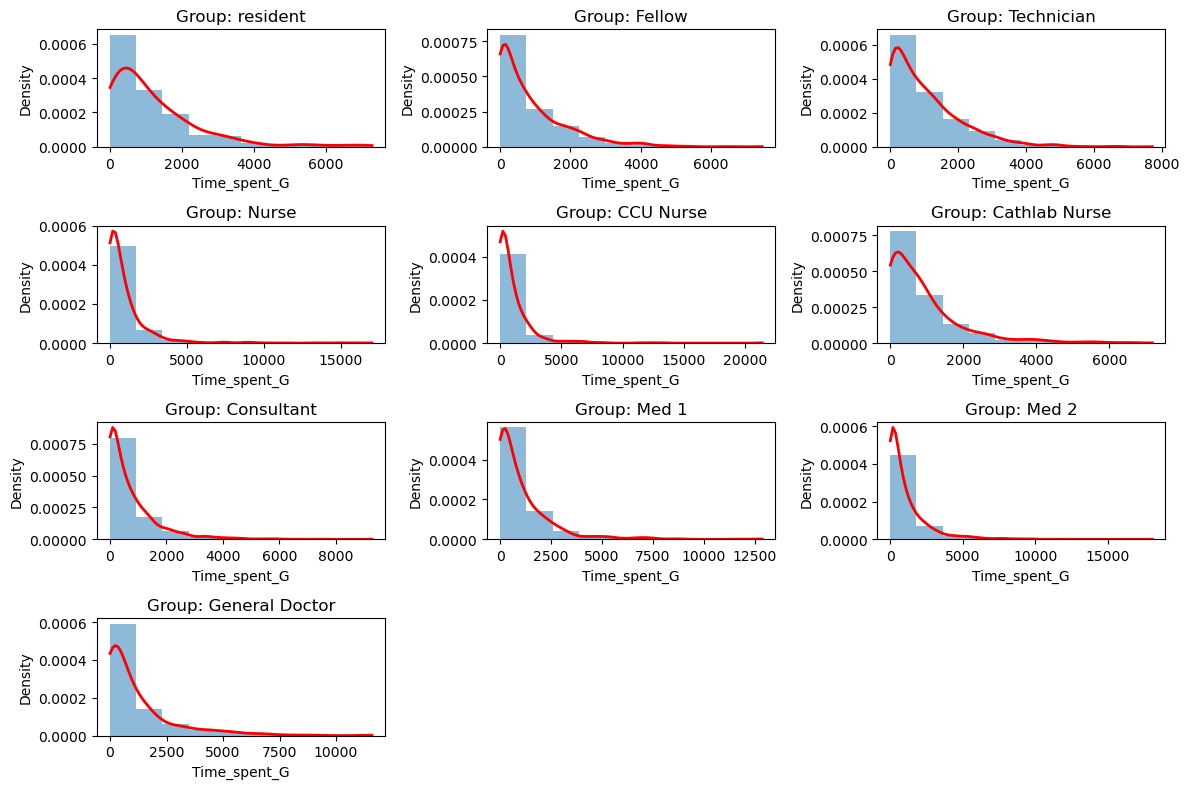

In [27]:

continuous_var = 'Time_spent_G'  #  continuous variable name
group_var = 'Group'  # R categorical variable for grouping

# Getting unique groups
groups = grid_ds1[group_var].unique()

# Creating separate histograms with distribution curves for each group arranged in a grid
num_groups = len(groups)
cols = 3  # Number of columns in the grid
rows = -(-num_groups // cols)  # Computing the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, group in enumerate(groups):
    group_data = grid_ds1[grid_ds1[group_var] == group][continuous_var].dropna()
    row = i // cols
    col = i % cols
    
    # Plotting histograms
    axes[row, col].hist(group_data, bins=10, density=True, alpha=0.5)
    axes[row, col].set_title(f'Group: {group}')
    axes[row, col].set_xlabel(continuous_var)
    axes[row, col].set_ylabel('Density')

    # Computing and plotting distribution curve using kernel density estimation (KDE)
    kde = gaussian_kde(group_data)
    x_vals = group_data.min(), group_data.max()
    x = np.linspace(x_vals[0], x_vals[1], 100)
    axes[row, col].plot(x, kde(x), 'r-', lw=2)

# Hiding empty subplot(s) if the number of groups doesn't fill the grid
for i in range(num_groups, rows * cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [33]:
grid_ds = grid_ds1
grid_ds[numerical_cols] = grid_ds1[numerical_cols].fillna(grid_ds[numerical_cols].mean())

#### Histogram of Time_Spent_G  by Group After Imputation

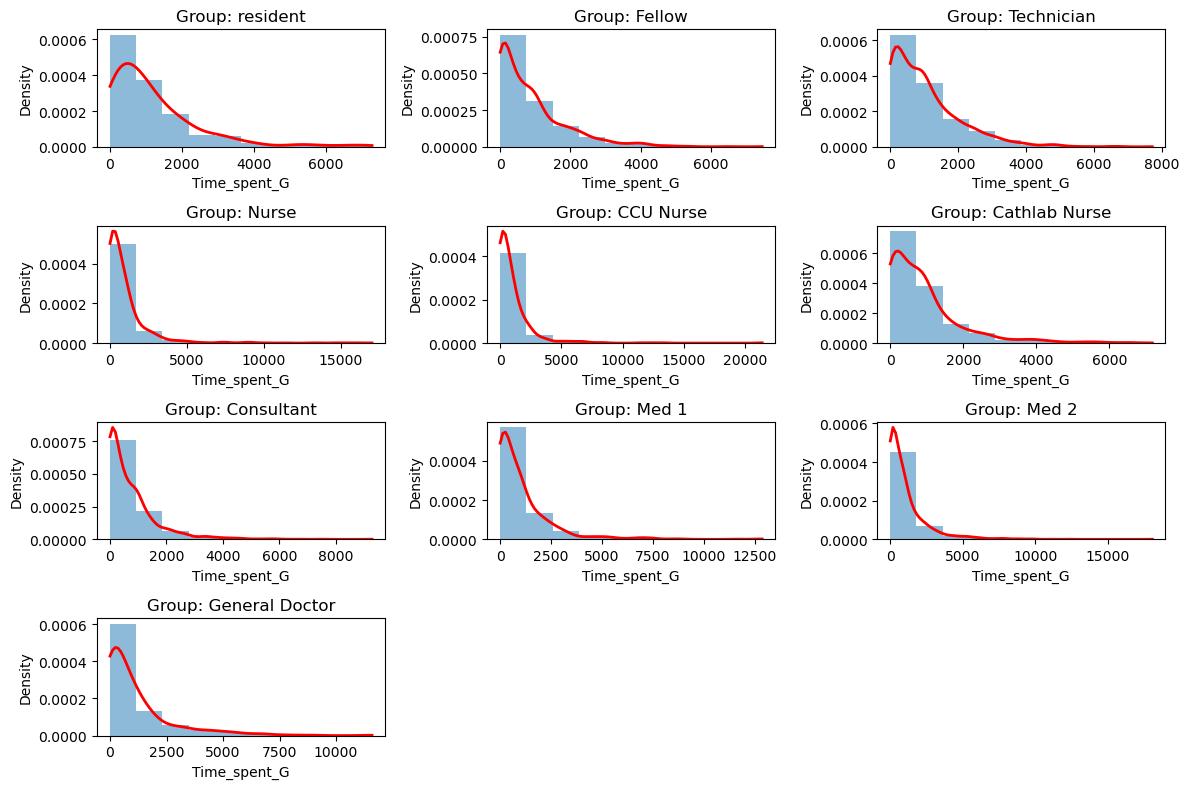

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# Assuming your DataFrame is named 'grid_ds' and contains 'Time_spent_G' and 'Group' columns
# Replace 'grid_ds' with the actual name of your DataFrame

continuous_var = 'Time_spent_G'  # Replace with your actual continuous variable name
group_var = 'Group'  # Replace with your categorical variable for grouping

# Getting unique groups
groups = grid_ds[group_var].unique()

# Creating separate histograms with distribution curves for each group arranged in a grid
num_groups = len(groups)
cols = 3  # Number of columns in the grid
rows = -(-num_groups // cols)  # Computing the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, group in enumerate(groups):
    group_data = grid_ds[grid_ds[group_var] == group][continuous_var].dropna()
    row = i // cols
    col = i % cols
    
    # Plotting histograms
    axes[row, col].hist(group_data, bins=10, density=True, alpha=0.5)
    axes[row, col].set_title(f'Group: {group}')
    axes[row, col].set_xlabel(continuous_var)
    axes[row, col].set_ylabel('Density')

    # Computing and plotting distribution curve using kernel density estimation (KDE)
    kde = gaussian_kde(group_data)
    x_vals = group_data.min(), group_data.max()
    x = np.linspace(x_vals[0], x_vals[1], 100)
    axes[row, col].plot(x, kde(x), 'r-', lw=2)

# Hiding empty subplot(s) if the number of groups doesn't fill the grid
for i in range(num_groups, rows * cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


### Handling zero age values

In [35]:
grid_ds1['Age'].mean()

4.365079365079365

In [36]:
# median would be appropraite to take as 4 years doctor/ nurse is meaning less.
#However there is no importance for this parameter in the further analysis so making it zero is not an issue.
grid_ds1['Age'].median()

0.0

[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  15.7s
[CV] END bootstrap=True, max_depth=74, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.8s
[CV] END bootstrap=False, max_depth=86, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  11.5s
[CV] END bootstrap=False, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   6.4s
[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   9.1s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  20.1s
[CV] END bootstrap=True, max_depth=56,

[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.2s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  11.5s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  13.4s
[CV] END bootstrap=True, max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.3s
[CV] END bootstrap=False, max_depth=92, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  21.1s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  24.4s
[CV] END bootstrap=False, max_depth=68, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.1s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.3s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  11.4s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  13.0s
[CV] END bootstrap=True, max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.0s
[CV] END bootstrap=False, max_depth=92, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  20.9s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  24.1s
[CV] END bootstrap=False, max_depth=68, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.1s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  11.3s
[CV] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  13.2s
[CV] END bootstrap=True, max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  15.2s
[CV] END bootstrap=False, max_depth=92, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  20.8s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  24.5s
[CV] END bootstrap=False, max_depth=68, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  15.6s
[CV] END bootstrap=True, max_depth=74, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.8s
[CV] END bootstrap=False, max_depth=86, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  11.5s
[CV] END bootstrap=False, max_depth=74, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   6.5s
[CV] END bootstrap=False, max_depth=98, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   9.0s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  19.4s
[CV] END bootstrap=True, max_depth=56,

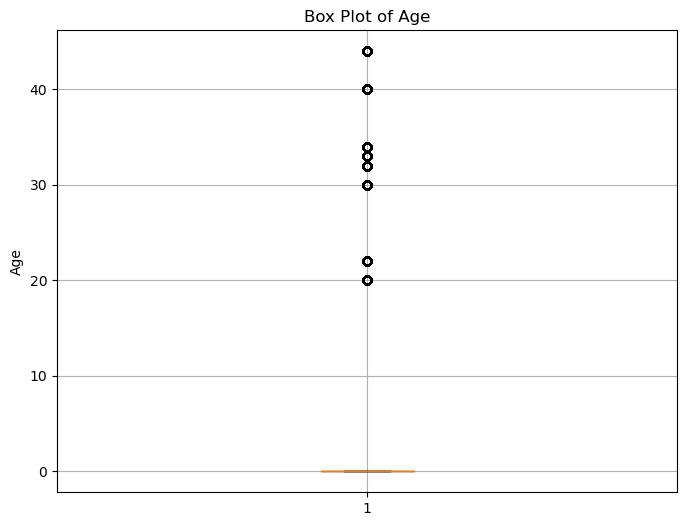

In [37]:
# Extracting the 'Age' column for the box plot
age_data = grid_ds1['Age']

# Creating the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(age_data, patch_artist=True, showfliers=True)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [38]:
# Filling the null values with median and mean values respectively 
median_age = grid_ds1[grid_ds1['Age']!=0]['Age'].median()
grid_ds['Age'] = grid_ds1['Age'].replace(0, median_age)

### Encoding the categorical variables and Scaling the continuous variables

In [39]:
object_cols = [ 'Respondent_Name', 'Gender', 'Group', 'Type', 'Label', 'ParentStimulus','Revisit_G_Revisitors', 'Revisit_G_Visitors', 'Revisit_F_Revisitors', 'Revisit_F_Visitors']
grid_ds[object_cols] = grid_ds[object_cols].fillna(grid_ds[object_cols].mode().iloc[0])

label_encoders = {}
for col in object_cols:
    label_encoders[col] = LabelEncoder()
    grid_ds[col] = label_encoders[col].fit_transform(grid_ds[col])
continuous_cols = ['Duration', 'Start', 'Time_spent_G', 'Time_spent_F','Revisit_G_Revisits', 'Revisit_F_Revisits','Fixations_Count', 'First_Fixation_Duration', 'Average_Fixations_Duration', 'Mouse_Clicks']

scaler = StandardScaler()

grid_ds[continuous_cols] = scaler.fit_transform(grid_ds[continuous_cols])

### Correlation

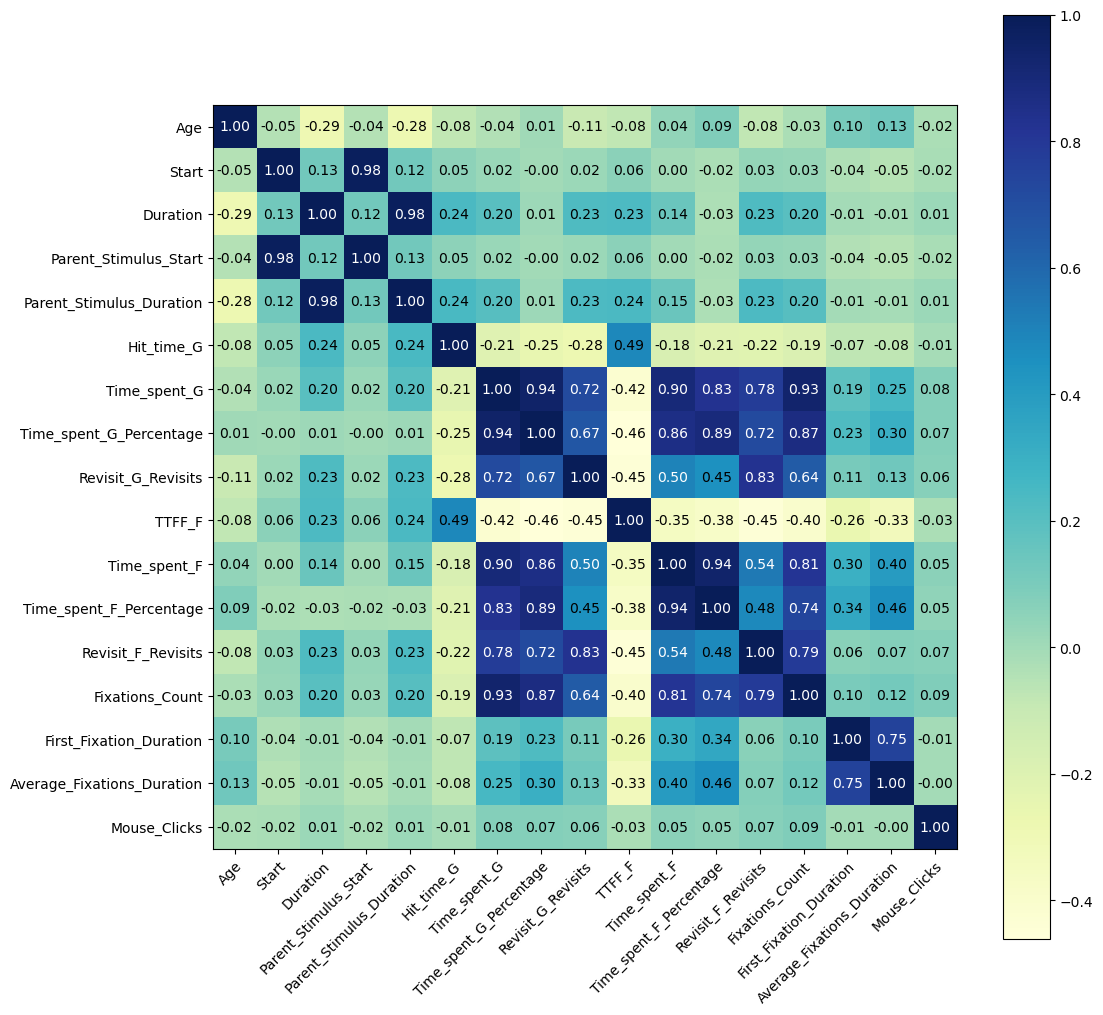

In [41]:
columns = grid_ds.columns 
cm = np.corrcoef(grid_ds[numerical_cols].values.T) # Calculating Pearson correlation
hm = heatmap(cm, figsize=(12,12), row_names=numerical_cols, column_names=numerical_cols, cmap="YlGnBu") #Representing correlation by a heat map
plt.show()

## Objective 2: Use a regression model to predict the time spent on each AOI (Time_spent_G) based on the practitioner's group (Group) and other features.
Target Variable : Time_spent_G

In [42]:
# Features are selected based on the correlation values
important_cols = ['Time_spent_F', 'Revisit_G_Revisitors', 'Revisit_G_Visitors', 'Revisit_G_Revisits', 'Revisit_F_Revisitors', 'Revisit_F_Visitors', 'Revisit_F_Revisits', 'Fixations_Count', 'Label','Group']

X = grid_ds[important_cols]
y = grid_ds['Time_spent_G']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear regression
linear_reg = LinearRegression()

# Train the classifier on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = linear_reg.predict(X_test)
y_pred_train = linear_reg.predict(X_train)

# Evaluate the model
print("Linear Regression Test:")
print(r2_score(y_test, y_pred_test))
print("Linear Regression Train:")
print(r2_score(y_train, y_pred_train))

Linear Regression Test:
0.9621414922976328
Linear Regression Train:
0.9594111101795004


In [43]:
# Checking for multicollinearity as we have identified this issue from the correlation matrix

# Fit a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif)


               Features        VIF
0          Time_spent_F   3.441612
1  Revisit_G_Revisitors   8.343072
2    Revisit_G_Visitors  16.049984
3    Revisit_G_Revisits   4.476204
4  Revisit_F_Revisitors   9.210725
5    Revisit_F_Visitors  16.569718
6    Revisit_F_Revisits   6.427497
7       Fixations_Count   6.313445
8                 Label   2.964230
9                 Group   3.148968


<b> multicollinearity is observed as the VIF scores are greater than 5. Using random forest for fetaure selection and from the understanding of data and sepcific problem, selecting features for further analysis</b>

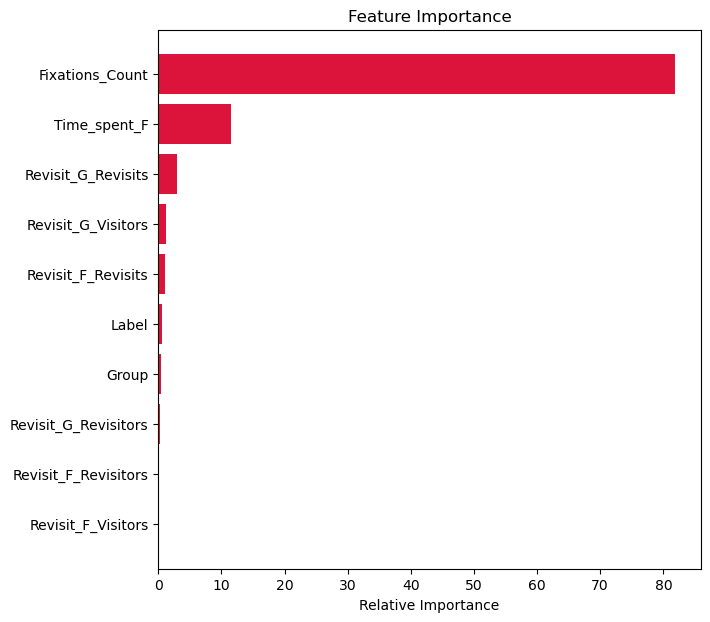

In [44]:
# Initialize the Random Forest Classifier
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_reg.fit(X, y)

# Calculating the feature importance

feature_importance = rf_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))
column_names = grid_ds[important_cols].columns
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
# Now use the column names in plt.yticks
plt.yticks(pos, column_names[sorted_idx])

plt.show()

<b> Peforming linear regression with selected features </b>

In [46]:
modified_cols = ['Time_spent_F','Revisit_G_Revisits','Revisit_F_Revisits','Fixations_Count','Label','Group']
# Assuming 'X' contains the features and 'y' contains the target variable 'Group'
X_n = grid_ds[modified_cols]
y_n = grid_ds['Time_spent_G']

# Split the data into training and testing sets
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y_n, test_size=0.3, random_state=42)
# Initialize the Random Forest Classifier
linear_reg = LinearRegression()

# Train the classifier on the training data
linear_reg.fit(Xn_train, yn_train)

# Make predictions on the test data
y_pred_test = linear_reg.predict(Xn_test)
y_pred_train = linear_reg.predict(Xn_train)

print("Linear Regression Test:")
print("r2_score",r2_score(yn_test, y_pred_test))
print("mean square error",mean_squared_error(yn_test, y_pred_test))
print("Linear Regression Train:")
print("r2_score",r2_score(yn_train, y_pred_train))
print("mean square error",mean_squared_error(yn_train, y_pred_train))

Linear Regression Test:
r2_score 0.9608012816009713
mean square error 0.04049803451582049
Linear Regression Train:
r2_score 0.9571839456607175
mean square error 0.04220436113433931


#### From the below stats it is observed that all the features are contributing to the data(p-value<0) and multicollinearity is handled by careful selection of features

In [47]:
# Importing the statsmodels api

import statsmodels.api as sm
X_n_train = sm.add_constant(Xn_train)     # Creating the bias term omega_0
model = sm.OLS(yn_train, X_n_train)       # Defining model and the data into the model
results = model.fit()                   # Fitting the data into the model

print('Summary:\n', results.summary())  # Printing the summary of results

Summary:
                             OLS Regression Results                            
Dep. Variable:           Time_spent_G   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 4.007e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:01:48   Log-Likelihood:                 1761.2
No. Observations:               10760   AIC:                            -3508.
Df Residuals:                   10753   BIC:                            -3457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0

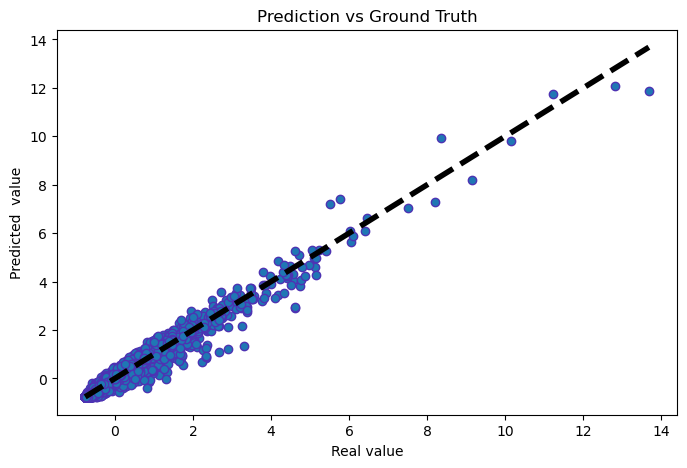

In [48]:
#Plot
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(yn_test, y_pred_test, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real value')
ax.set_ylabel('Predicted  value')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

In [49]:
# Initialize the Random Forest Classifier
rf_reg = RandomForestRegressor(n_estimators=200,random_state=42)

# Train the classifier on the training data
rf_reg.fit(Xn_train, yn_train)

# Make predictions on the test data
y_pred_test = rf_reg.predict(Xn_test)
y_pred_train = rf_reg.predict(Xn_train)

# Evaluate the model
print("Random Forest Regression Test:")
print("r2_score",r2_score(yn_test, y_pred_test))
print("mean square error",mean_squared_error(yn_test, y_pred_test))
print("Random Forest Regression Train:")
print("r2_score",r2_score(yn_train, y_pred_train))
print("mean square error",mean_squared_error(yn_train, y_pred_train))

Random Forest Regression Test:
r2_score 0.9717229966287866
mean square error 0.0292142984593024
Random Forest Regression Train:
r2_score 0.9948317615356135
mean square error 0.005094402227045747


<span style="color:green; font-weight:bold">Both Linear Regression and Random Forest Regression are performing well. Although Random Forest is potentially prone to overfitting due to its ability to capture complex patterns in the data, both models exhibit strong performance.
 </span>

## Objective 3: What individual characteristics predict whether a participant will revisit a AOI?

Target Variable : Revisit_G_Visitors

If the value of Revisit-G is 0, it means that the participant did not revisit the grid-based AOI after their initial visit.

If the value of Revisit-G is 1, it means that the participant revisited the grid-based AOI at least once after their initial visit.

In [50]:
class_counts = grid_ds['Group'].value_counts()
print("Counts of each class and its labels:")
print(class_counts)

Counts of each class and its labels:
6    2684
3    2440
8    2440
2    2196
7    1464
1    1464
5    1220
0     732
4     488
9     244
Name: Group, dtype: int64


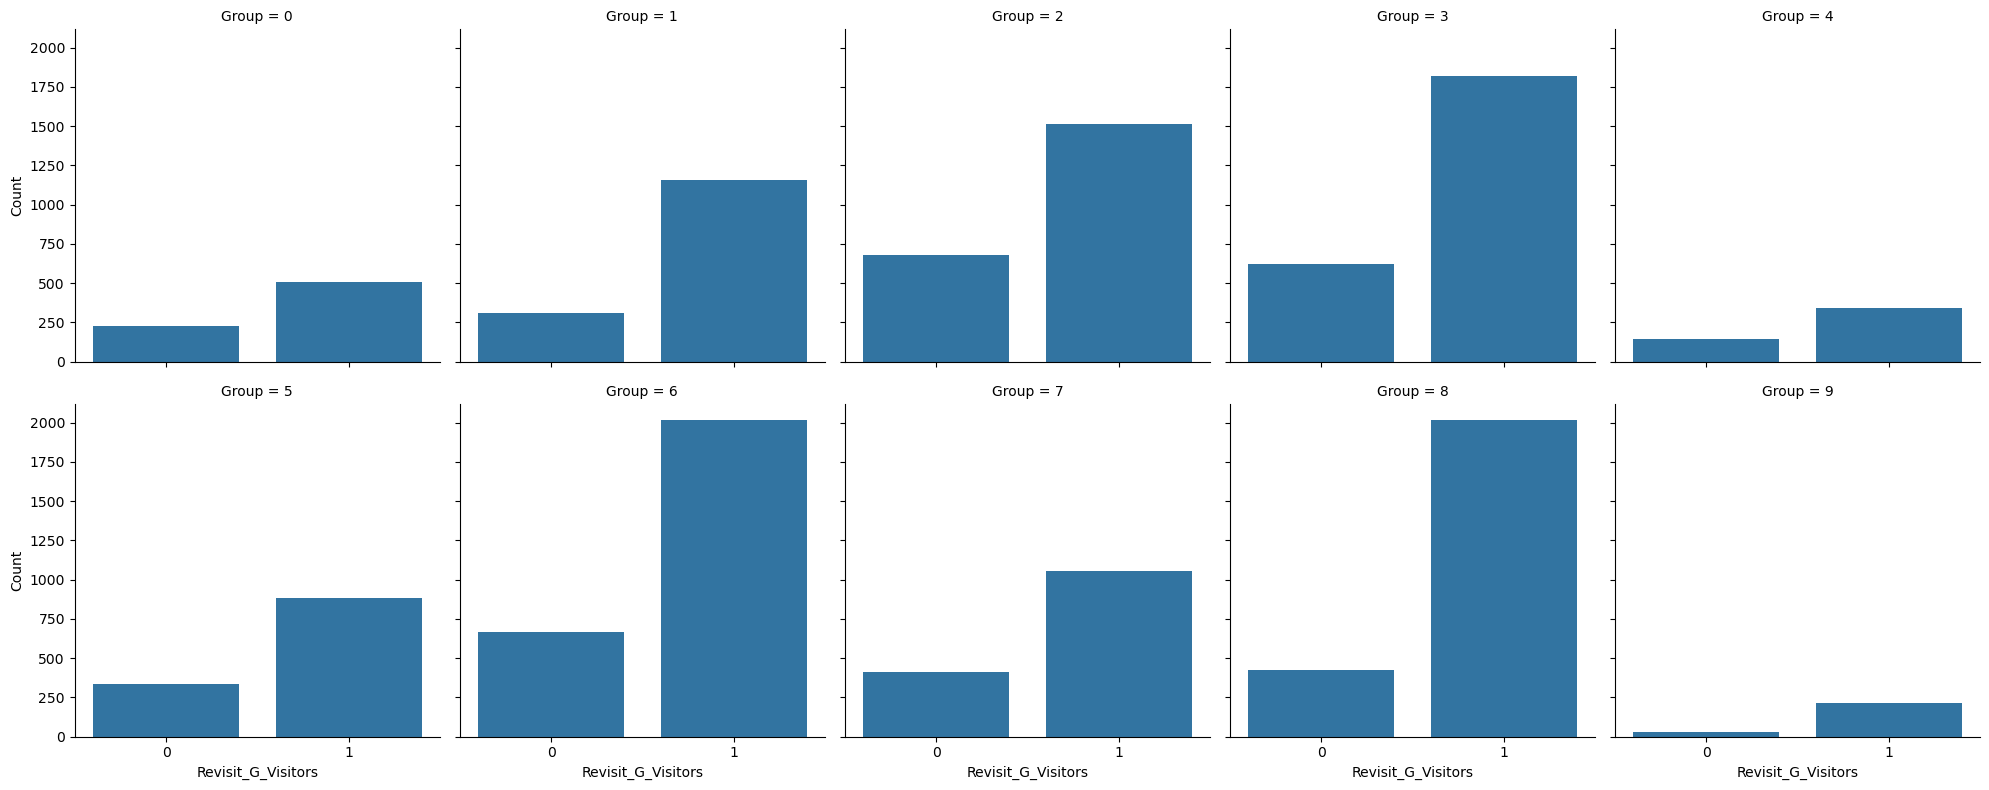

In [51]:
# Create a FacetGrid with 3 rows and 3 columns
g = sns.FacetGrid(grid_ds, col='Group', col_wrap=5, height=4)

# Map a count plot onto the grid for each group class
g.map(sns.countplot, 'Revisit_G_Visitors')

# Set titles and labels
g.set_xlabels('Revisit_G_Visitors')
g.set_ylabels('Count')

plt.tight_layout()
plt.show()

### This is binary unbalanced classification problem

In [53]:
class_counts = grid_ds['Revisit_G_Visitors'].value_counts()
print("Counts of each class and its labels:")
print(class_counts)

Counts of each class and its labels:
1    11524
0     3848
Name: Revisit_G_Visitors, dtype: int64


#### Performing Chi-Square test for checking the assosciation between Group and target variable [Revisit_G_Visitors].

In [55]:
contingency_table = pd.crosstab(grid_ds['Group'], grid_ds['Revisit_G_Visitors'])

# Performing the chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square value for group: {chi2}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")

Chi-square value for group: 178.87251928149624
P-value: 8.711954759202795e-34
Degrees of freedom: 9


#### Performing Chi-Square test for checking the assosciation between ParentStimulus and target variable [Revisit_G_Visitors].

In [56]:
# Assuming 'Group' and 'Revisiting' are the actual column names in your dataset
contingency_table = pd.crosstab(grid_ds['ParentStimulus'], grid_ds['Revisit_G_Visitors'])

# Performing the chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square value for Parent Stimulus: {chi2}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")

Chi-square value for Parent Stimulus: 90.89836446093516
P-value: 1.0748524790900989e-15
Degrees of freedom: 9


#### Logistic regression

In [57]:
log_reg = LogisticRegression(random_state=42)

#Selected categorical variables based on chi square value and continuous variables relevant to specific problem.
important_cols1 = ['Group','Time_spent_F','Time_spent_G', 'Fixations_Count',]
#important_cols1 = ['Group','Label']
X1 = grid_ds[important_cols1]
y1 = grid_ds['Revisit_G_Visitors']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

log_reg.fit(X1_train, y1_train)

print('Train report Logistic Regression\n',classification_report(y1_train,log_reg.predict(X1_train)))
print('Test report Logistic regression\n',classification_report(y1_test,log_reg.predict(X1_test)))

Train report Logistic Regression
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2718
           1       0.99      0.97      0.98      8042

    accuracy                           0.97     10760
   macro avg       0.95      0.97      0.96     10760
weighted avg       0.97      0.97      0.97     10760

Test report Logistic regression
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1130
           1       0.99      0.97      0.98      3482

    accuracy                           0.97      4612
   macro avg       0.95      0.97      0.96      4612
weighted avg       0.97      0.97      0.97      4612



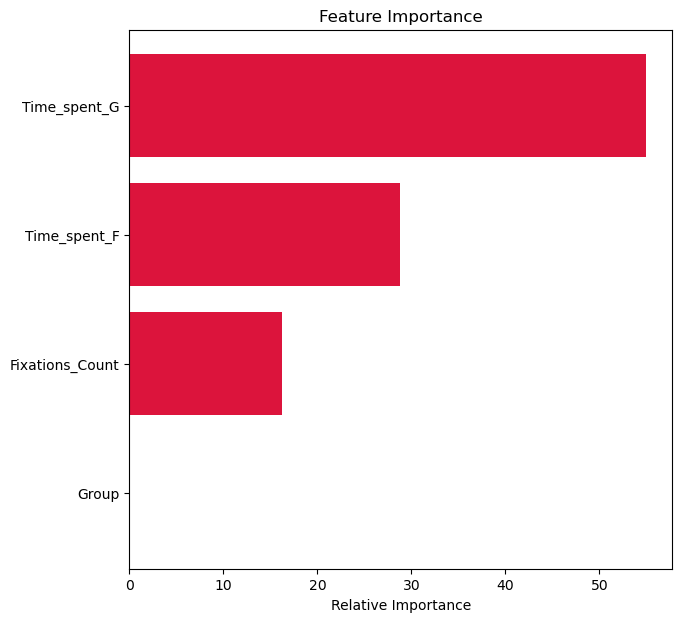

In [58]:
rf_clf = RandomForestClassifier(n_estimators=3000, max_depth=6, max_leaf_nodes=8, random_state=3)
rf_clf.fit(X1, y1)

# Calculating the feature importance

feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))
column_names = grid_ds[important_cols1].columns
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
# Now use the column names in plt.yticks
plt.yticks(pos, column_names[sorted_idx])

plt.show()

In [59]:
# Load your Logistic Regression model object
model = sm.Logit(y1, X1).fit()

# Get and print the model summary
summary = model.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.378200
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     Revisit_G_Visitors   No. Observations:                15372
Model:                          Logit   Df Residuals:                    15368
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.3279
Time:                        18:04:57   Log-Likelihood:                -5813.7
converged:                       True   LL-Null:                       -8649.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Group               0.4639      0.008     55.948      0.000       0.448       0.480
Time_spent_F  

From the above stats and feature importance all the features are contributing to the model and below interpreatations can be made.

<span style="color:red; font-weight:bold"> Interpretations : </span>


<span style="color:green; font-weight:bold">
    
    
The longer participants spend gazing at a specific AOI (Area of Interest), the more likely they are to revisit it. 

A higher number of fixations on an AOI decreases the probability of revisiting. 

Similar to fixations, a longer total fixation time on an AOI decreases the probability of revisiting. </span>

#### SVM Classifier

In [61]:
svm_clf = svm.SVC(kernel='rbf', gamma='auto', C=10)
svm_clf.fit(X1_train, y1_train)              # Fit the train data
y_tr_pred = svm_clf.predict(X1_train)    # Predict the target for train data
y_ts_pred = svm_clf.predict(X1_test)    # Predict the target for test data
tr_score = metrics.f1_score(y1_train, y_tr_pred)  # Compute train accuracy
ts_score = metrics.f1_score(y1_test, y_ts_pred)  # Compute test accuracy
tr_report = classification_report(y1_train, y_tr_pred)  # Generate classification report for train data
ts_report = classification_report(y1_test, y_ts_pred)  # Generate classification report for test data
print('Train Classification Report: \n\n', tr_report,'\n\n')
print('Test Classification Report: \n\n', ts_report)

Train Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.95      2718
           1       0.98      0.98      0.98      8042

    accuracy                           0.97     10760
   macro avg       0.96      0.97      0.96     10760
weighted avg       0.97      0.97      0.97     10760
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1130
           1       0.98      0.98      0.98      3482

    accuracy                           0.97      4612
   macro avg       0.96      0.96      0.96      4612
weighted avg       0.97      0.97      0.97      4612



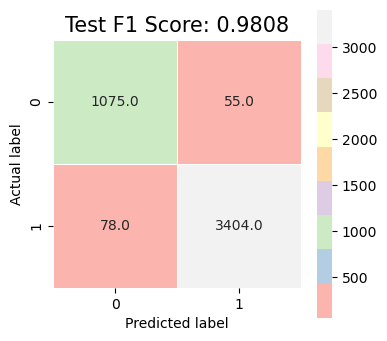

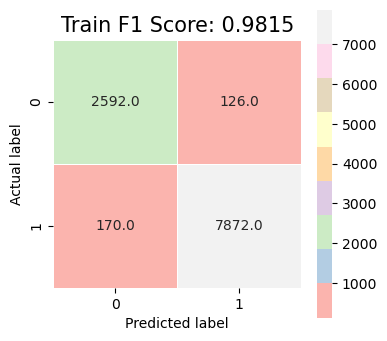

In [62]:
test_c_matrix = confusion_matrix(y1_test, y_ts_pred)  # Compute the test confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test F1 Score: {0}'.format(round(ts_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Computing the confusion matrix for the test subset

train_c_matrix = confusion_matrix(y1_train, y_tr_pred)  # Compute the test confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train F1 Score: {0}'.format(round(tr_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

<b> To handle false positives and false negatives is equally important for this specific problem. So, considering F1 score as a deciding factor for model performance.
    
 <span style="color:green; font-weight:bold"> Both Logistic regression and SVM performed well for the problem exhibiting robust F1-scores across Classes 0 and 1, maintaining a strong balance between precision and recall on the train and test sets.</span>